<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy', 'pandas'])
await piplite.install(['seaborn'])
await piplite.install(['scipy'])
await piplite.install(['statsmodels'])

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-1-f12cafb11262>:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [2]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [3]:
boston_df=pd.read_csv(boston_url)
boston_df.isnull().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
dtype: int64

#### Add your code below following the instructions given in the course to complete the peer graded assignment


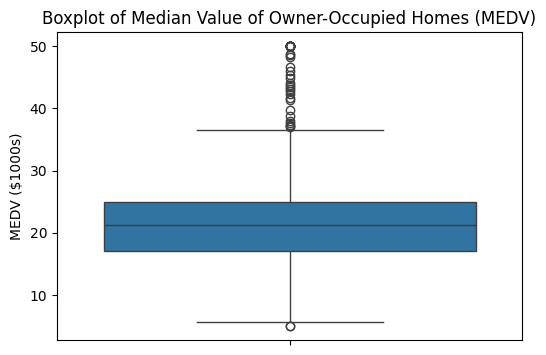

In [4]:
plt.figure(figsize=(6,4))
sns.boxplot(y=boston_df['MEDV'])
plt.title("Boxplot of Median Value of Owner-Occupied Homes (MEDV)")
plt.ylabel("MEDV ($1000s)")
plt.show()


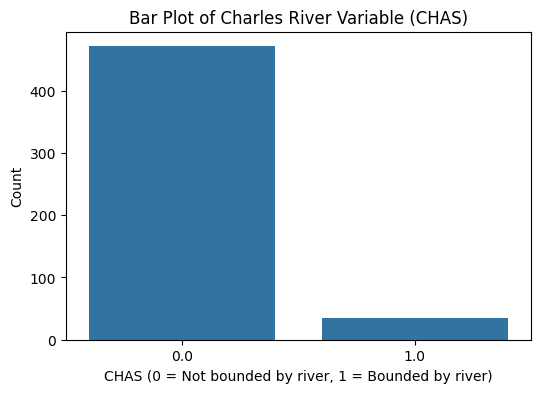

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='CHAS', data=boston_df)
plt.title("Bar Plot of Charles River Variable (CHAS)")
plt.xlabel("CHAS (0 = Not bounded by river, 1 = Bounded by river)")
plt.ylabel("Count")
plt.show()

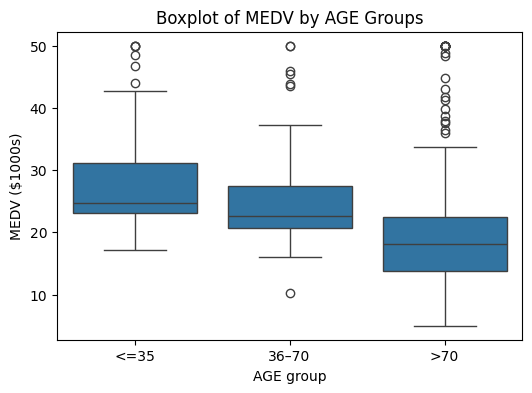

In [6]:
bins = [-1, 35, 70, 100]
labels = ['<=35', '36–70', '>70']
boston_df['AGE_grp'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

plt.figure(figsize=(6,4))
sns.boxplot(x='AGE_grp', y='MEDV', data=boston_df)
plt.title("Boxplot of MEDV by AGE Groups")
plt.xlabel("AGE group")
plt.ylabel("MEDV ($1000s)")
plt.show()

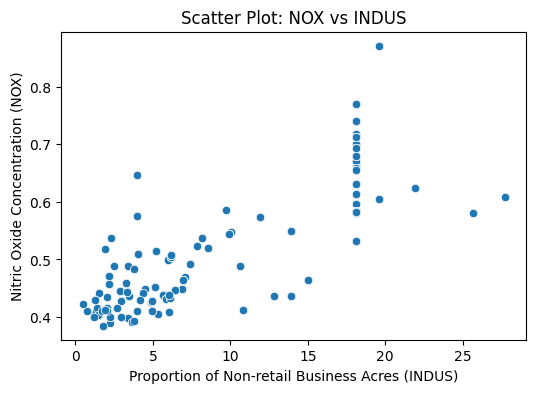

In [7]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title("Scatter Plot: NOX vs INDUS")
plt.xlabel("Proportion of Non-retail Business Acres (INDUS)")
plt.ylabel("Nitric Oxide Concentration (NOX)")
plt.show()

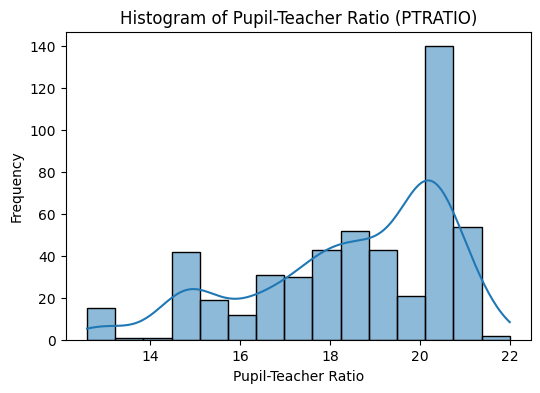

In [8]:
plt.figure(figsize=(6,4))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=True)
plt.title("Histogram of Pupil-Teacher Ratio (PTRATIO)")
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Frequency")
plt.show()

In [9]:
medv_river = boston_df[boston_df['CHAS']==1]['MEDV']
medv_nonriver = boston_df[boston_df['CHAS']==0]['MEDV']

t_stat, p_val = stats.ttest_ind(medv_river, medv_nonriver, equal_var=False)
print("T-statistic:", t_stat, " P-value:", p_val)

T-statistic: 3.113291312794837  P-value: 0.003567170098137517


In [10]:
anova_result = stats.f_oneway(
    boston_df[boston_df['AGE_grp']=='<=35']['MEDV'],
    boston_df[boston_df['AGE_grp']=='36–70']['MEDV'],
    boston_df[boston_df['AGE_grp']=='>70']['MEDV']
)
print("F-statistic:", anova_result.statistic, " P-value:", anova_result.pvalue)

F-statistic: 36.40764999196599  P-value: 1.7105011022702984e-15


In [11]:
corr, p_val = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("Correlation coefficient:", corr, " P-value:", p_val)

Correlation coefficient: 0.7636514469209192  P-value: 7.913361061210442e-98


In [12]:
X = sm.add_constant(boston_df['DIS'])
y = boston_df['MEDV']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 22 Sep 2025   Prob (F-statistic):           1.21e-08
Time:                        08:50:00   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

In [13]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

# T-test (CHAS vs MEDV)
    # No difference
    # If p-value < 0.05 -> reject
    # Homes by the river have significantly different median values when compared with homes not by the river.

In [14]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

# ANOVA (AGE groups vs MEDV)
    # No difference
    # If p-value < 0.05 -> reject
    # Housing stock age (+/- 1940) has an affect on home values.

In [15]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

# Pearson Correlation (NOX vs INDUS)
    # No linear relationship
    # If p-value < 0.05 -> reject
    # There's a significant positive correlation between pollution levelas and industrial land usage.

In [16]:
# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

# Regression (DIS vs MEDV)
    # No effect
    # Look at regression coefficient for DIS and it;s p-value. p < 0.05 is statistically significant.
    # As distance from employment centers increases, house values increase/decrease depending on coefficient sign.